In [26]:
import json
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
triples_path = "/Users/matevass/Documents/Projects/KGEntityMatching/data/triples_v2/"
mappings_path = "/Users/matevass/Documents/Projects/KGEntityMatching/data/triples_v2/"
filtered_triples_path = "/Users/matevass/Documents/Projects/KGEntityMatching/data/filtered_triples_new/"

In [12]:
edges_to_delete = [
    "/File:",
    "/Special:FilePath/",
    "http://dbkwik.webdatacommons.org/ontology/Image",
    "http://xmlns.com/foaf/0.1/depiction",
    "http://dbkwik.webdatacommons.org/ontology/thumbnail",
    "http://dbkwik.webdatacommons.org/ontology/wikiPageWikiLinkText",
    "http://purl.org/dc/elements/1.1/rights",
    "http://www.w3.org/2004/02/skos/core#altLabel",
    "http://www.w3.org/2000/01/rdf-schema#comment",
    "http://dbkwik.webdatacommons.org/ontology/abstract",
    "http://dbkwik.webdatacommons.org/ontology/wikiPageExternalLink",
    "http://www.w3.org/2000/01/rdf-schema#label",
    "http://www.w3.org/2004/02/skos/core#prefLabel"
]

In [13]:
triples = sorted([elem for elem in os.listdir(triples_path) if ".triples" in elem])
mappings = sorted([elem for elem in os.listdir(triples_path) if ".json" in elem])
filtered_triples = sorted([elem for elem in os.listdir(filtered_triples_path) if ".triples" in elem])
num_of_files = len(triples)

In [39]:
for i in range(num_of_files):

    triple = triples[i]
    mapping = mappings[i]

    kept = 0
    deleted = 0

    with open(triples_path + triple, "r") as t, open(mappings_path + mapping, "r") as m, open(filtered_triples_path + triple, "w") as f:

        mapping = json.load(m)
        reversed_mapping = {str(v): k for k, v in mapping.items()}

        for line in t:
            entities = line.strip().split("###")
            node_1 = reversed_mapping.get(entities[0], None)
            node_2 = reversed_mapping.get(entities[1], None)
            edge_type = reversed_mapping.get(entities[2], None)
            line_as_string = node_1 + "###" + node_2 + "###" + edge_type
            if any(substring in line_as_string for substring in edges_to_delete):
                deleted += 1
            elif node_1.startswith("http") and node_2.startswith("http"):
                kept += 1
                f.write(line)
                
        print(f"{triple}: {deleted}/{kept + deleted} triples are deleted")

marvel.triples: 3990582/6623845 triples are deleted
mcu.triples: 748000/1205115 triples are deleted
memoryalpha.triples: 824407/2441764 triples are deleted
memorybeta.triples: 677115/2423767 triples are deleted
starwars.triples: 1933040/7724870 triples are deleted
stexpanded.triples: 187665/511049 triples are deleted
swg.triples: 129351/238270 triples are deleted
swtor.triples: 61284/132527 triples are deleted


In [43]:
for i in range(num_of_files):

    triple = triples[i]
    mapping = mappings[i]

    if triple != "stexpanded.triples":
        continue

    graph_df = pd.read_csv(filtered_triples_path + triple, sep="###", engine="python")
    G = nx.Graph()
    for row in graph_df.itertuples():
        G.add_edge(int(row[1]), int(row[2]))
    print(G)

Graph with 32297 nodes and 252868 edges


In [44]:
sorted(G.degree, key=lambda x: x[1], reverse=True)

[(484, 4533),
 (187, 3952),
 (577, 3119),
 (154, 2742),
 (197, 2190),
 (719, 2077),
 (98, 1984),
 (88, 1914),
 (617, 1855),
 (278, 1708),
 (101, 1692),
 (1795, 1624),
 (24, 1462),
 (1049, 1410),
 (39, 1401),
 (107, 1383),
 (3387, 1301),
 (1298, 1293),
 (159, 1274),
 (227, 1195),
 (717, 1070),
 (424, 1064),
 (1729, 1038),
 (2824, 1019),
 (2099, 1013),
 (119, 1008),
 (988, 864),
 (3098, 806),
 (48, 789),
 (2764, 761),
 (13, 721),
 (1456, 701),
 (945, 677),
 (319, 667),
 (1517, 656),
 (917, 641),
 (2322, 637),
 (1085, 636),
 (549, 634),
 (2553, 631),
 (1967, 612),
 (296, 601),
 (423, 587),
 (2345, 557),
 (1844, 540),
 (1374, 531),
 (1739, 526),
 (2020, 523),
 (2170, 513),
 (851, 512),
 (2139, 507),
 (775, 503),
 (1207, 502),
 (538, 491),
 (1526, 484),
 (2362, 478),
 (1429, 473),
 (1836, 472),
 (1921, 466),
 (1880, 462),
 (1163, 459),
 (271, 458),
 (1114, 453),
 (141, 451),
 (733, 447),
 (473, 442),
 (382, 439),
 (2997, 439),
 (43, 434),
 (417, 429),
 (1190, 425),
 (397, 421),
 (2482, 414)

Text(0, 0.5, 'Frequency')

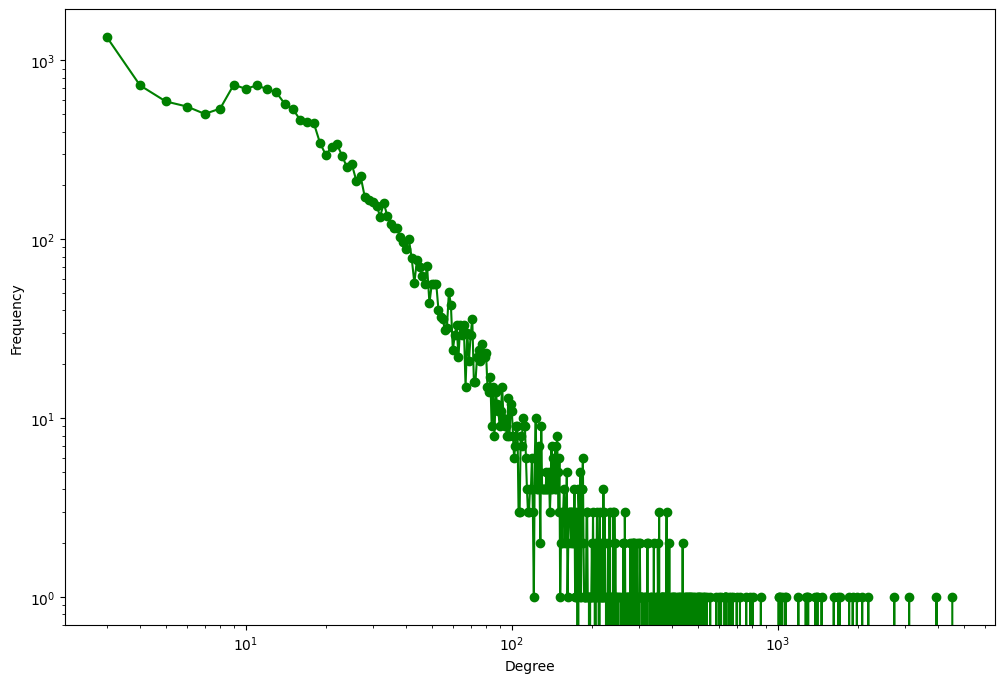

In [45]:
m=3
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.loglog(degrees[m:], degree_freq[m:],'go-')
plt.xlabel('Degree')
plt.ylabel('Frequency')